# Create a model

# Import Tools

In [1]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ML modules

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDClassifier, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score
#from sklearn.metrics import PredictionErrorDisplay

from pprint import pprint # Look at parameters used by our current forest

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style
plt.style.use('fivethirtyeight')
sns.set_style("darkgrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False})

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3']
sns.set_palette(sns.color_palette(sns_colors))

primary = '#FF6D43'
secondary = '#00135D'

# Import Data

In [2]:
# Import the dataset and load DF
df_ml = pd.read_csv('../data/df_ml.csv')
df_ml

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
0,Volkswagen,Polo GTI,34690.00,Petrol,10.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI
1,Volkswagen,Polo GTI,34950.00,Petrol,1500.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI
2,Volkswagen,Polo GTI,29990.00,Petrol,9000.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,7.40,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
3,Volkswagen,Polo GTI,33989.00,Petrol,3511.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.80,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
4,Volkswagen,Polo GTI,37980.00,Petrol,211.00,Automatic,2023.00,152.00,1.00,Small car,Demonstration vehicle,5.70,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,BMW,i3,24500.00,Electro,41800.00,Automatic,2018.00,135.00,2.00,Small car,Used,0.00,0.00,Gray,1.50,Rear,Small car,5.00,BMW i3
9154,BMW,i3,19750.00,Electro,35846.00,Automatic,2018.00,125.00,1.00,Sedan,Used,0.00,0.00,Black,1.50,Rear,Small car,5.00,BMW i3
9155,BMW,i3,19999.00,Electro,34300.00,Automatic,2018.00,125.00,1.00,Small car,Used,0.00,0.00,Black,1.50,Rear,Small car,5.00,BMW i3
9156,BMW,i3,21999.00,Electro,46000.00,Automatic,2018.00,75.00,2.00,Small car,Used,0.00,0.00,Gray,1.50,Rear,Small car,5.00,BMW i3


## Stat

In [3]:
df_ml.describe()

,price,mileage,registration,hp,owner,consumption,emission,displacement,car_age
count,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00
mean,27724.97,63291.24,2018.33,124.07,1.44,5.03,122.21,1.78,4.67
std,11818.15,56821.31,3.24,29.98,0.60,1.59,36.48,0.35,3.24
min,4800.00,0.00,2012.00,41.00,1.00,0.00,0.00,0.00,0.00
25%,18592.50,15818.25,2016.00,110.00,1.00,4.50,118.00,1.50,2.00
50%,25990.00,48366.00,2019.00,120.00,1.00,5.20,126.00,1.97,4.00
75%,35449.75,95807.50,2021.00,140.00,2.00,5.80,140.00,1.98,7.00
max,87985.00,400000.00,2023.00,284.00,4.00,47.00,240.00,3.00,11.00


In [4]:
df_ml[df_ml['price']>35449]

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
4,Volkswagen,Polo GTI,37980.00,Petrol,211.00,Automatic,2023.00,152.00,1.00,Small car,Demonstration vehicle,5.70,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
8,Volkswagen,Polo GTI,36980.00,Petrol,1001.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.60,133.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
10,Volkswagen,Polo GTI,35480.00,Petrol,35.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,7.20,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
13,Volkswagen,Polo GTI,37999.00,Petrol,2900.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.80,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
14,Volkswagen,Polo GTI,35804.00,Petrol,1500.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.70,159.00,Red,1.98,Front,Small car,0.00,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,Volkswagen,Tiguan,49900.00,Petrol,2979.00,Automatic,2023.00,180.00,1.00,SUV,Demonstration vehicle,5.30,149.00,Gray,1.98,Four.w.d,Compact SUV,0.00,Volkswagen Tiguan
9111,Audi,Q3,53490.00,Petrol,3050.00,Automatic,2023.00,110.00,1.00,SUV,Demonstration vehicle,5.80,133.00,Gray,1.50,Front,Compact SUV,0.00,Audi Q3
9112,Audi,Q3,49860.00,Petrol,5900.00,Automatic,2023.00,110.00,1.00,SUV,Demonstration vehicle,5.80,157.00,Gray,1.50,Front,Compact SUV,0.00,Audi Q3
9114,BMW,i3,35890.00,Electro,8300.00,Automatic,2022.00,75.00,1.00,Sedan,Used,0.00,0.00,Blue,1.50,Rear,Small car,1.00,BMW i3


# DF prep

In [5]:
df = df_ml.copy()

In [6]:
# change date from float to date/int
df['registration'] = pd.to_datetime(df['registration'].map('{:.0f}'.format), format='%Y').dt.year

In [7]:
# change columns order
df = df.loc[:, ['make', 'model',  'fuel', 'mileage', 'gear', 'registration',
       'hp', 'owner', 'body', 'car_condition', 'consumption', 'emission',
       'color', 'displacement', 'drive_type', 'car_class', 'car_age', 'car', 'price']]

In [8]:
df.head(3)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,Volkswagen,Polo GTI,Petrol,10.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI,34690.00
1,Volkswagen,Polo GTI,Petrol,1500.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI,34950.00
2,Volkswagen,Polo GTI,Petrol,9000.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,7.40,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI,29990.00


In [9]:
# Change object type of data to Category
obj_cat_list = list(df.select_dtypes(include=['object']).columns)
df[obj_cat_list] = df[obj_cat_list].astype('category')
df.dtypes

make             category
model            category
fuel             category
mileage           float64
gear             category
registration        int64
hp                float64
owner             float64
body             category
car_condition    category
consumption       float64
emission          float64
color            category
displacement      float64
drive_type       category
car_class        category
car_age           float64
car              category
price             float64
dtype: object

In [10]:
#Check the shape of the data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 9158 rows and 19 columns


# Label Encoder

In [11]:
df.head(2)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,Volkswagen,Polo GTI,Petrol,10.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI,34690.00
1,Volkswagen,Polo GTI,Petrol,1500.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI,34950.00


In [12]:
df.columns

Index(['make', 'model', 'fuel', 'mileage', 'gear', 'registration', 'hp',
       'owner', 'body', 'car_condition', 'consumption', 'emission', 'color',
       'displacement', 'drive_type', 'car_class', 'car_age', 'car', 'price'],
      dtype='object')

In [13]:
## make

le_make = LabelEncoder()
df['make'] = le_make.fit_transform(df['make'])
df['make'].unique()

array([3, 0, 2, 1, 4])

In [14]:
## model

le_model = LabelEncoder()
df['model'] = le_model.fit_transform(df['model'])
df['model'].unique()

array([10,  3,  2,  8,  4,  0,  6,  9,  5,  1,  7, 12, 11, 13, 14, 15])

In [15]:
## fuel

le_fuel = LabelEncoder()
df['fuel'] = le_fuel.fit_transform(df['fuel'])
df['fuel'].unique()

array([2, 0, 1])

In [16]:
## gear

le_gear = LabelEncoder()
df['gear'] = le_gear.fit_transform(df['gear'])
df['gear'].unique()

array([0, 1, 2])

In [17]:
## body

le_body = LabelEncoder()
df['body'] = le_body.fit_transform(df['body'])
df['body'].unique()

array([3, 4, 5, 0, 1, 2])

In [18]:
## car_condition

le_car_condition = LabelEncoder()
df['car_condition'] = le_car_condition.fit_transform(df['car_condition'])
df['car_condition'].unique()

array([2, 1, 0, 4, 3])

In [19]:
## color

le_color = LabelEncoder()
df['color'] = le_color.fit_transform(df['color'])
df['color'].unique()

array([ 6,  1, 12, 10,  2, 11, 13,  7,  4, 14,  5,  8,  0,  3,  9])

In [20]:
## drive_type

le_drive_type = LabelEncoder()
df['drive_type'] = le_drive_type.fit_transform(df['drive_type'])
df['drive_type'].unique()

array([1, 2, 0])

In [21]:
## car class (small - SUV)

le_car_class = LabelEncoder()
df['car_class'] = le_car_class.fit_transform(df['car_class'])
df['car_class'].unique()

array([2, 3, 1, 0])

In [22]:
## car (car_make_model)

le_car_make_model = LabelEncoder()
df['car'] = le_car_make_model.fit_transform(df['car'])
df['car'].unique()
#le.classes_

array([13,  0,  8, 11,  1,  4,  9, 12,  2,  5, 10, 14,  3,  6, 15,  7])

In [23]:
df.head(3)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,3,10,2,10.00,0,2023,152.00,1.00,3,2,4.20,138.00,6,1.98,1,2,0.00,13,34690.00
1,3,10,2,1500.00,0,2023,152.00,1.00,3,2,6.60,138.00,1,2.00,2,2,0.00,13,34950.00
2,3,10,2,9000.00,0,2023,152.00,1.00,3,2,7.40,138.00,12,1.98,1,2,0.00,13,29990.00


# Train-Test-Split

In [24]:
# Train-tests-plit Label
X = df.drop(['price', 'car_age', 'make', 'model'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RSEED)

In [25]:
# Size of train and test set
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5494, 15)
y_train:  (5494,)
X_test:  (3664, 15)
y_test:  (3664,)


## Standard scaler

In [26]:
# Scaling with standard scaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection

## Corr Matrix Absolute values

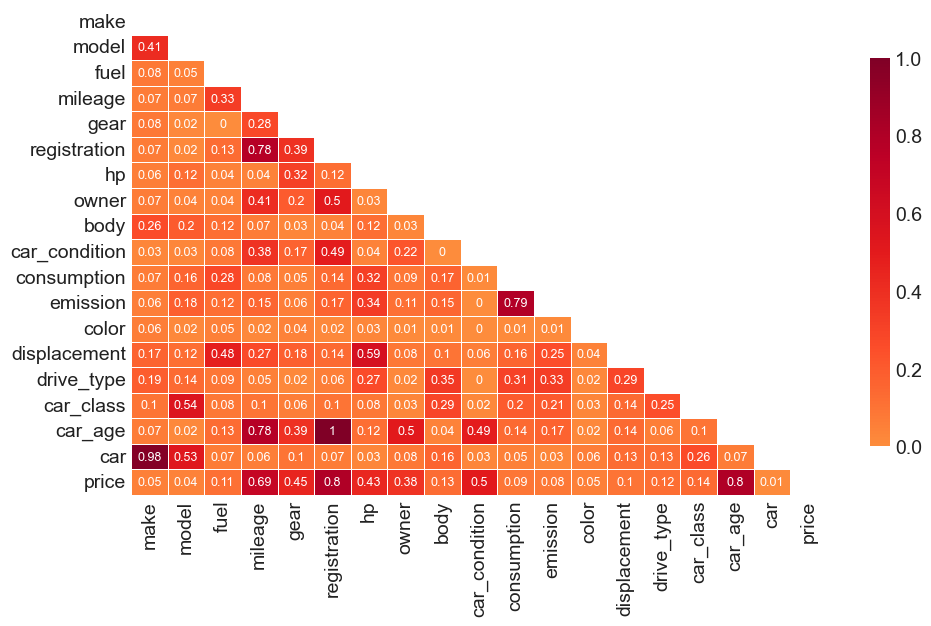

In [27]:
# Compute the correlation matrix
corr = df.corr().abs().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap='YlOrRd', vmin=0, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size":9});

## Price corr features acc to corr matrix

In [28]:
#all features with correlation to price
corr_price = corr['price'].sort_values(ascending=False).tolist()

In [29]:
# features with corr score > 0.3 (absolute values)
corr['price'][corr['price']>0.4]

mileage         0.69
gear            0.45
registration    0.80
hp              0.43
car_condition   0.50
car_age         0.80
price           1.00
Name: price, dtype: float64

## Univariate feature selection

In [30]:
# define and fit data
feature_selector = SelectKBest(f_regression, k = 'all')
fit = feature_selector.fit(X_train_scaled,y_train)

# set variables
scores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "f_score", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

In [31]:
univariate = selected_variables

# Models

### MAE - mean absolute error
* The mean absolute error uses the same scale as the data being measured.
* MAE is calculated as the sum of absolute errors divided by the sample size
* average difference between y_true and y_pred

### MSE - Mean squared error
* the average squared difference between the estimated values and the actual value.
* best is smallest value of MSE

### median absolute error
* median_absolute_error robust to outliers.
* the loss is calculated by taking the median of all absolute differences between the target and the prediction.


### MAPE - mean absolute percentage error
* The idea of this metric is to be sensitive to relative errors. 

## Functions

In [32]:
# Calculate metric

test_metrics = []

def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test, model):
    
    # Metrics on Trining Data
    print("Metrics on training data")
    rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
    r2 = r2_score(y_train,y_pred_train)
    
    print("r2:", round(r2, 2))
    print("RMSE: €", round(rmse, 2))
    print('Mean Absolute Error: €',mean_absolute_error(y_train, y_pred_train).round(2))
    print('Mean Absolute Percentage Error: %',(mean_absolute_percentage_error(y_train, y_pred_train).round(3)))
    print('Median Absolute Error: €',median_absolute_error(y_train, y_pred_train).round(2))
    print("---"*10)

    # Metrics in Test data
    print("Metrics on test data")
    r2_test = r2_score(y_test,y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    med_test = median_absolute_error(y_test, y_pred_test)

    print("r2:", round(r2_test, 2))
    print("RMSE: €", round(rmse_test, 2))
    print('Mean Absolute Error: €',mean_absolute_error(y_test, y_pred_test).round(2))
    print('Mean Absolute Percentage Error: %',mape_test.round(3))
    print('Median Absolute Error: €',med_test.round(2))
    print("---"*10)
    
    metrics_dict = {'model':model, 'r2': r2_test.round(2), 'rmse':rmse_test.round(2),  'med_ae': med_test.round(2), 'mape': mape_test.round(2)}
    
    test_metrics.append(metrics_dict)
    
    df_metrics = pd.DataFrame.from_records(test_metrics)


In [33]:
# residual plots
# Function für residual plot
def error_analysis(y_test, y_pred_test):
    
    # Calculate residuals
    residuals = y_test - y_pred_test

    # Plot real vs. predicted values
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    # True vs. predicted values
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([0, 70000], [0,70000], color="#00135D")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    
    # Residual Scatter Plot
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([0, 70000], [0,0], color="#00135D")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")

#call function()

# Linear Regression

In [34]:
# LABEL 
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# intercept and slope
intercept = lr.intercept_
coeffitients = lr.coef_

#print("Model intercept: %.3f"%intercept)
#print("coeffitients: ", coeffitients)

# y predicted
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print("Linear Regression Model:")
print('---'*10)

calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'LR')

Linear Regression Model:
------------------------------
Metrics on training data
r2: 0.84
RMSE: € 4745.5
Mean Absolute Error: € 3609.79
Mean Absolute Percentage Error: % 0.145
Median Absolute Error: € 2912.38
------------------------------
Metrics on test data
r2: 0.84
RMSE: € 4740.29
Mean Absolute Error: € 3575.27
Mean Absolute Percentage Error: % 0.143
Median Absolute Error: € 2875.74
------------------------------


In [35]:
# check coefficients, that model used.
def coeff_info(model):
    coeff_used = np.sum(model.coef_!=0)
    print('- The model is using', coeff_used, 'out of', X_train_scaled.shape[1])
    print( "- The highest coefficient has a value of:", max(model.coef_.round(3)))

coeff_info(lr)

- The model is using 15 out of 15
- The highest coefficient has a value of: 6144.773


In [36]:
# calculating coefficients
coeff_lr = pd.DataFrame(X_train.columns)
coeff_lr['Coef. LR'] = pd.Series(lr.coef_)
coeff_lr.rename(columns={0: 'Features'}, inplace=True)

In [37]:
coeff_lr

,Features,Coef. LR
0,fuel,-1047.00
1,mileage,-2866.11
2,gear,-770.32
3,registration,6144.77
4,hp,3627.66
5,owner,71.57
6,body,-416.20
7,car_condition,-1716.10
8,consumption,444.93
9,emission,647.28


## plot residuals

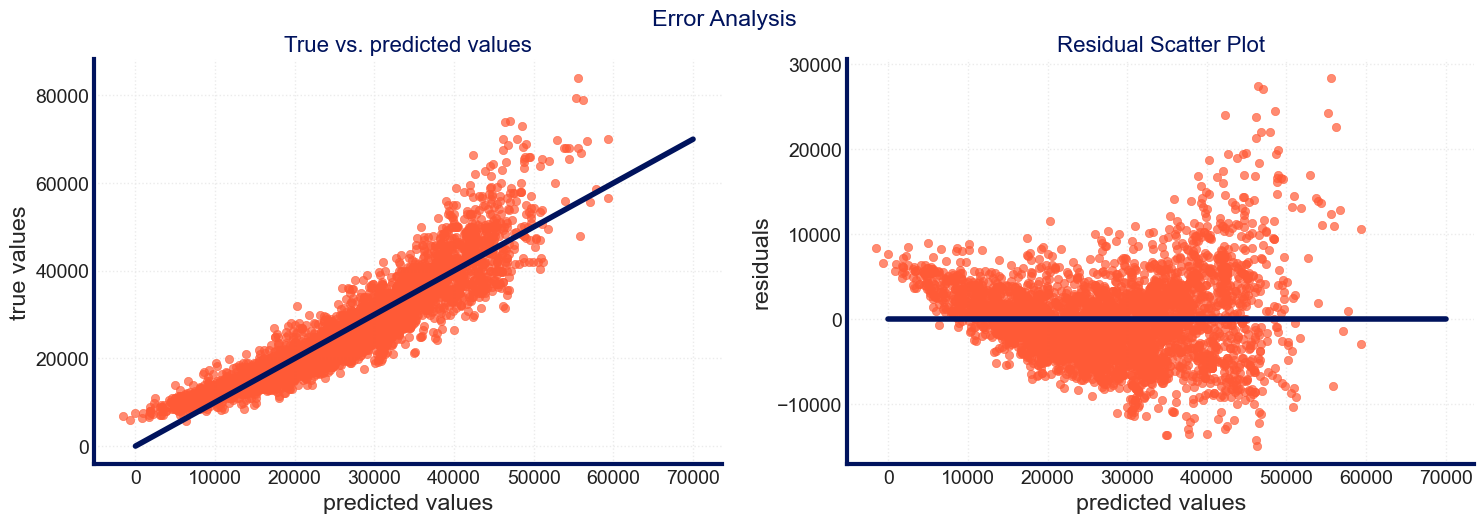

In [38]:
# call Function to plot
error_analysis(y_test, y_pred_test)

- the first plot revils some, e.g. curved, parabolic shapes, what is a sign of non-linearity in the data and the model doesn’t capture this non-linear effects.
- the second plot of residuals, reminds of a funnel shape: a sign of non constant variance i.e. heteroskedasticity, which arises in presence of outliers. These values get too much weight and thereby disproportionately influence the model’s performance.
-> In order to capture this non-linear effects, the polynomial regression will be applied

## ridgeReg

In [39]:
from sklearn.linear_model import Ridge

## training the model on scaled data
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train_scaled,y_train)

y_train_ridge = ridgeReg.predict(X_train_scaled)
y_pred_ridge = ridgeReg.predict(X_test_scaled)

print("Ridge on scaled data:")
print("---"*10)
calculate_metrics(y_train,y_train_ridge, y_test, y_pred_ridge, 'ridgeReg')

Ridge on scaled data:
------------------------------
Metrics on training data
r2: 0.84
RMSE: € 4767.54
Mean Absolute Error: € 3589.83
Mean Absolute Percentage Error: % 0.142
Median Absolute Error: € 2858.13
------------------------------
Metrics on test data
r2: 0.84
RMSE: € 4768.9
Mean Absolute Error: € 3566.34
Mean Absolute Percentage Error: % 0.141
Median Absolute Error: € 2865.36
------------------------------


In [40]:
coeff_lr_ridge = pd.DataFrame(X_train.columns)
coeff_lr_ridge['Coef. Ridge'] = pd.Series(ridgeReg.coef_)
coeff_lr_ridge.rename(columns={0: 'Ridge Features'}, inplace=True)

## lassoReg

In [41]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train_scaled,y_train)

y_train_lasso = lassoReg.predict(X_train_scaled)
y_pred_lasso = lassoReg.predict(X_test_scaled)

print("Lasso on scaled data:")
print("---"*10)
calculate_metrics(y_train,y_train_lasso, y_test, y_pred_lasso, 'lassoReg')

Lasso on scaled data:
------------------------------
Metrics on training data
r2: 0.84
RMSE: € 4747.04
Mean Absolute Error: € 3605.04
Mean Absolute Percentage Error: % 0.145
Median Absolute Error: € 2898.62
------------------------------
Metrics on test data
r2: 0.84
RMSE: € 4740.04
Mean Absolute Error: € 3572.01
Mean Absolute Percentage Error: % 0.142
Median Absolute Error: € 2866.01
------------------------------


In [42]:
coeff_lr_lasso = pd.DataFrame(X_train.columns)
coeff_lr_lasso['Coef. Lasso'] = pd.Series(lassoReg.coef_)
coeff_lr_lasso.rename(columns={0: 'Lasso Features'}, inplace=True)

## LassoCV

In [43]:
lasso_cv = LassoCV(cv=5, random_state=RSEED)
lasso_cv.fit(X_train_scaled,y_train)

y_train_lasso_cv = lasso_cv.predict(X_train_scaled)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

print("Ridge on scaled data:")
print("---"*10)
calculate_metrics(y_train,y_train_lasso_cv, y_test, y_pred_lasso_cv, 'LassoCV')

Ridge on scaled data:
------------------------------
Metrics on training data
r2: 0.84
RMSE: € 4745.78
Mean Absolute Error: € 3607.47
Mean Absolute Percentage Error: % 0.145
Median Absolute Error: € 2919.61
------------------------------
Metrics on test data
r2: 0.84
RMSE: € 4739.83
Mean Absolute Error: € 3573.52
Mean Absolute Percentage Error: % 0.143
Median Absolute Error: € 2876.38
------------------------------


In [44]:
coeff_lassoCV = pd.DataFrame(X_train.columns)
coeff_lassoCV['Coef. Lasso_CV'] = pd.Series(lasso_cv.coef_)
coeff_lassoCV.rename(columns={0: 'LassoCV Features'}, inplace=True)

## LR Elastic Net

In [45]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=False)
ENreg.fit(X_train_scaled,y_train)

y_train_elnet = ENreg.predict(X_train_scaled)
y_pred_elnet = ENreg.predict(X_test_scaled)

print("Ridge on scaled data:")
print("---"*10)
calculate_metrics(y_train,y_train_elnet, y_test, y_pred_elnet, 'ElasticNet')

Ridge on scaled data:
------------------------------
Metrics on training data
r2: 0.84
RMSE: € 4745.5
Mean Absolute Error: € 3609.53
Mean Absolute Percentage Error: % 0.145
Median Absolute Error: € 2912.09
------------------------------
Metrics on test data
r2: 0.84
RMSE: € 4740.22
Mean Absolute Error: € 3575.06
Mean Absolute Percentage Error: % 0.143
Median Absolute Error: € 2877.13
------------------------------


In [46]:
coeff_elNet = pd.DataFrame(X_train.columns)
coeff_elNet['Coef. elNet'] = pd.Series(ENreg.coef_)
coeff_elNet.rename(columns={0: 'LassoCV Features'}, inplace=True)

## DF 3 coefficinets + plot

In [47]:
# combine all coeffitient features into one df
df_coef = pd.concat([coeff_lr, coeff_lr_ridge, coeff_lr_lasso, coeff_lassoCV, coeff_elNet], axis=1)
df_coef.drop(['Lasso Features', 'LassoCV Features'], inplace=True, axis=1)

In [48]:
df_coef

,Features,Coef. LR,Ridge Features,Coef. Ridge,Coef. Lasso,Coef. Lasso_CV,Coef. elNet
0,fuel,-1047.00,fuel,-843.58,-934.48,-999.52,-1042.15
1,mileage,-2866.11,mileage,-2991.55,-2834.98,-2853.40,-2865.07
2,gear,-770.32,gear,-902.69,-752.12,-762.71,-769.58
3,registration,6144.77,registration,5618.55,6142.23,6143.24,6144.34
4,hp,3627.66,hp,3314.74,3543.35,3592.01,3623.99
5,owner,71.57,owner,-102.38,27.44,52.84,69.60
6,body,-416.20,body,-404.23,-384.80,-402.87,-414.79
7,car_condition,-1716.10,car_condition,-1779.36,-1700.45,-1709.46,-1715.41
8,consumption,444.93,consumption,426.75,409.63,429.83,443.27
9,emission,647.28,emission,622.02,628.19,639.33,646.53


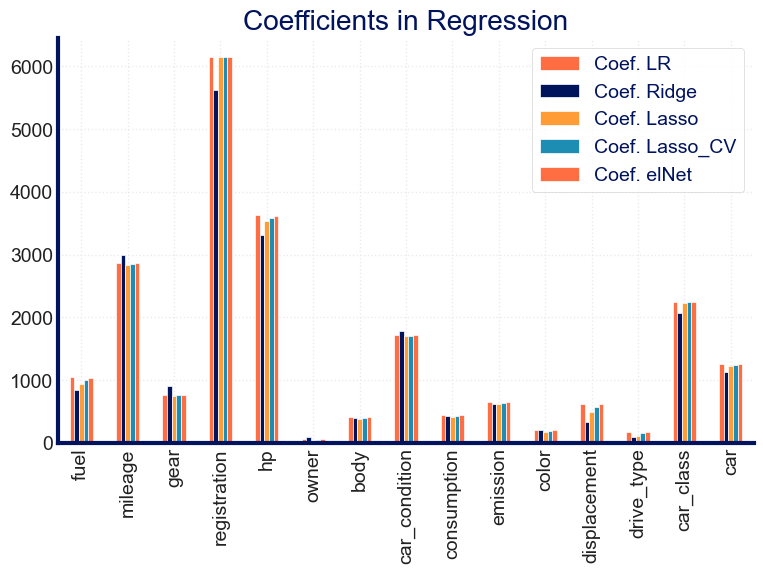

In [49]:
# take absolute values, for easier sorting and comparison
df_coef_abs = df_coef.copy()
for col in df_coef_abs.select_dtypes(include=['float64']).columns:
    df_coef_abs[col] = df_coef_abs[col].abs()
    
# plot all coeffitients in one plot
df_coef_abs.plot(kind='bar', title = 'Coefficients in Regression')
ax = plt.gca()
ax.set_xticklabels(df_coef_abs['Ridge Features']);

## Relevant features acc. to Regression:


- fuel, mileage, gear, registration, hp, car_condition, car_class
- make+model / car

In [50]:
df_coef_abs.sort_values('Coef. Lasso', ascending=False, inplace=True)

In [55]:
lasso_features = df_coef_abs[df_coef_abs['Coef. Lasso']>700]
list_lasso_features = lasso_features['Ridge Features'].to_list()
lasso_features

,Features,Coef. LR,Ridge Features,Coef. Ridge,Coef. Lasso,Coef. Lasso_CV,Coef. elNet
3,registration,6144.77,registration,5618.55,6142.23,6143.24,6144.34
4,hp,3627.66,hp,3314.74,3543.35,3592.01,3623.99
1,mileage,2866.11,mileage,2991.55,2834.98,2853.40,2865.07
13,car_class,2251.10,car_class,2067.32,2222.77,2239.05,2249.81
7,car_condition,1716.10,car_condition,1779.36,1700.45,1709.46,1715.41
14,car,1264.76,car,1138.71,1228.17,1249.23,1263.12
0,fuel,1047.00,fuel,843.58,934.48,999.52,1042.15
2,gear,770.32,gear,902.69,752.12,762.71,769.58


# Polynomial LR 2

In [56]:
# Creat epolynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

x_poly_train = poly.fit_transform(X_train_scaled)
x_poly_test = poly.transform(X_test_scaled)

# print nr of polynomial features
print('Polynomial features of X', poly.n_output_features_)

Polynomial features of X 135


In [57]:
# Train LInear Regression on Polynomial features

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)

y_pred_poly_train = model_poly.predict(x_poly_train)
y_pred_poly_test = model_poly.predict(x_poly_test)

print("Polynomial Regression Model (degree 2):")
print("---"*10)
calculate_metrics(y_train,y_pred_poly_train, y_test, y_pred_poly_test, 'Poly LR')

Polynomial Regression Model (degree 2):
------------------------------
Metrics on training data
r2: 0.91
RMSE: € 3536.59
Mean Absolute Error: € 2586.96
Mean Absolute Percentage Error: % 0.098
Median Absolute Error: € 1928.29
------------------------------
Metrics on test data
r2: 0.91
RMSE: € 3542.84
Mean Absolute Error: € 2574.53
Mean Absolute Percentage Error: % 0.099
Median Absolute Error: € 1910.34
------------------------------


In [58]:
# check coefficients, that model used.
def coeff_info(model):
    coeff_used = np.sum(model.coef_!=0)
    print(f'- The model is using {coeff_used} out of {poly.n_output_features_} features.')
    print( "- The highest coefficient has a value of:", max(model.coef_.round(3)))

coeff_info(model_poly)

- The model is using 135 out of 135 features.
- The highest coefficient has a value of: 6136.424


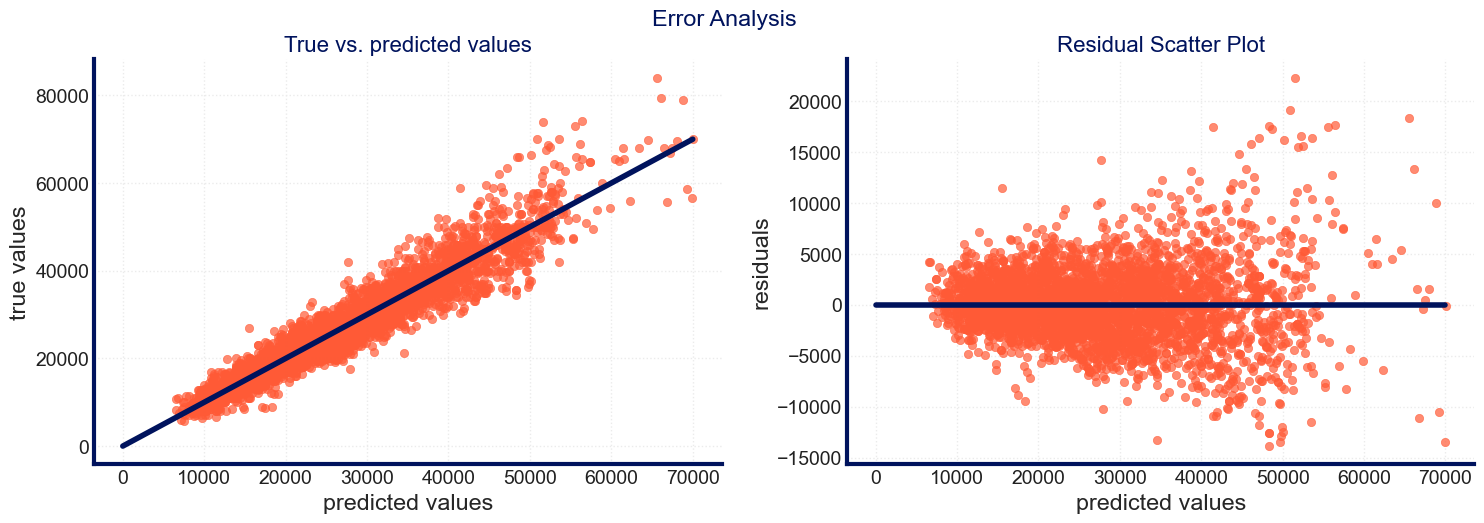

In [59]:
# call Function to plot residuals
error_analysis(y_test, y_pred_poly_test)

## Ridge on ploynomial

In [60]:
## training the model on polynomial data
ridgeReg = Ridge(alpha=0.025, normalize=True)
ridgeReg.fit(x_poly_train,y_train)

y_pred_poly_ridge_train = ridgeReg.predict(x_poly_train)
y_pred_poly_ridge_test = ridgeReg.predict(x_poly_test)

print("Ridge on Polynomial data:")
print("---"*10)
calculate_metrics(y_train, y_pred_poly_ridge_train, y_test, y_pred_poly_ridge_test, 'PolyRidge')

Ridge on Polynomial data:
------------------------------
Metrics on training data
r2: 0.91
RMSE: € 3560.93
Mean Absolute Error: € 2596.79
Mean Absolute Percentage Error: % 0.099
Median Absolute Error: € 1929.7
------------------------------
Metrics on test data
r2: 0.91
RMSE: € 3554.69
Mean Absolute Error: € 2577.21
Mean Absolute Percentage Error: % 0.099
Median Absolute Error: € 1912.39
------------------------------


## Lasso on polynomial

In [61]:
## training the model on polynomial data

lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_poly_train,y_train)

y_pred_poly_lasso_train = lassoReg.predict(x_poly_train)
y_pred_poly_lasso_test = lassoReg.predict(x_poly_test)

print("Ridge on Polynomial data:")
print("---"*10)
calculate_metrics(y_train, y_pred_poly_lasso_train, y_test, y_pred_poly_lasso_test, 'Poly Lasso')

Ridge on Polynomial data:
------------------------------
Metrics on training data
r2: 0.91
RMSE: € 3541.94
Mean Absolute Error: € 2586.07
Mean Absolute Percentage Error: % 0.098
Median Absolute Error: € 1925.19
------------------------------
Metrics on test data
r2: 0.91
RMSE: € 3538.91
Mean Absolute Error: € 2568.41
Mean Absolute Percentage Error: % 0.098
Median Absolute Error: € 1892.24
------------------------------


# Random Forest

In [62]:
# RF normal

rf = RandomForestRegressor(random_state=RSEED)

rf.fit(X_train, y_train)

# y predicted
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Random Forest Metrics:")
print('---'*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'RF')

Random Forest Metrics:
------------------------------
Metrics on training data
r2: 0.99
RMSE: € 1132.54
Mean Absolute Error: € 797.31
Mean Absolute Percentage Error: % 0.03
Median Absolute Error: € 584.62
------------------------------
Metrics on test data
r2: 0.94
RMSE: € 2949.92
Mean Absolute Error: € 2112.56
Mean Absolute Percentage Error: % 0.081
Median Absolute Error: € 1549.38
------------------------------


## RF GridSearch

In [63]:
estimator=RandomForestRegressor(random_state=RSEED)

param_grid = { 
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0001, 0.001],
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [6, 9, 12],
    'max_leaf_nodes': [3, 6, 9]
}

gs = GridSearchCV(estimator, param_grid=param_grid, cv = StratifiedKFold(), scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(f'{estimator}', gs.best_params_ )

RandomForestRegressor(random_state=3) {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0001, 'n_estimators': 25}


In [64]:
regressor = gs.best_estimator_
regressor.fit(X_train, y_train)

# y predicted
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Random Forest Metrics:")
print('---'*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'RF_grid')

Random Forest Metrics:
------------------------------
Metrics on training data
r2: 0.99
RMSE: € 1132.54
Mean Absolute Error: € 797.31
Mean Absolute Percentage Error: % 0.03
Median Absolute Error: € 584.62
------------------------------
Metrics on test data
r2: 0.94
RMSE: € 2949.92
Mean Absolute Error: € 2112.56
Mean Absolute Percentage Error: % 0.081
Median Absolute Error: € 1549.38
------------------------------


## plot Feature importance

In [65]:
import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


In [66]:
X.columns

Index(['fuel', 'mileage', 'gear', 'registration', 'hp', 'owner', 'body',
       'car_condition', 'consumption', 'emission', 'color', 'displacement',
       'drive_type', 'car_class', 'car'],
      dtype='object')

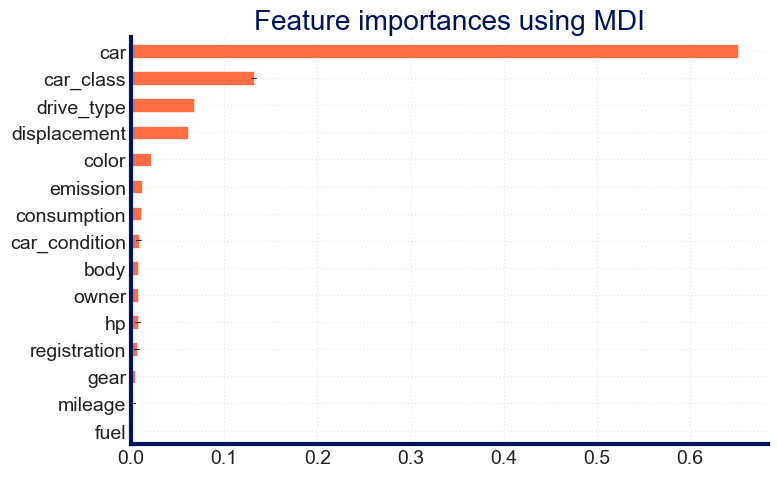

In [67]:
rf_importances = pd.Series(importances, index=X.columns).sort_values()

#rename index
index_ = ['fuel', 'mileage', 'gear', 'registration', 'hp', 'owner', 'body',
       'car_condition', 'consumption', 'emission', 'color', 'displacement',
       'drive_type', 'car_class', 'car']
rf_importances.index = index_
  

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot(kind='barh', yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
# Set the ticks and ticklabels for all axes

fig.tight_layout()
#ax.figure.savefig("feature_importance_MDI.png", dpi=300,  bbox_inches = 'tight')

# XGB

In [68]:
xgb = XGBRegressor(random_state=RSEED, objective='reg:squarederror')

xgb.fit(X_train, y_train)

# y predicted
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("Random Forest Metrics:")
print('---'*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'XGB')

Random Forest Metrics:
------------------------------
Metrics on training data
r2: 0.98
RMSE: € 1464.4
Mean Absolute Error: € 1056.45
Mean Absolute Percentage Error: % 0.041
Median Absolute Error: € 762.33
------------------------------
Metrics on test data
r2: 0.94
RMSE: € 2885.12
Mean Absolute Error: € 2077.6
Mean Absolute Percentage Error: % 0.079
Median Absolute Error: € 1518.82
------------------------------


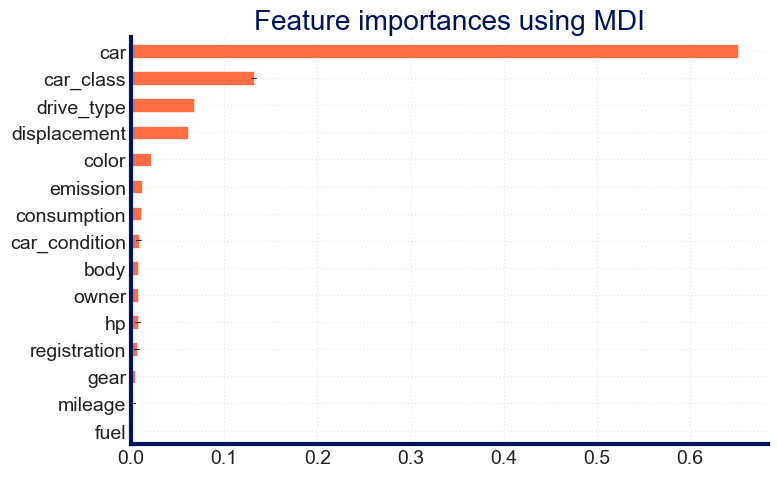

In [69]:
xgb_importances = pd.Series(importances, index=X.columns).sort_values()

#rename index
index_ = ['fuel', 'mileage', 'gear', 'registration', 'hp', 'owner', 'body',
       'car_condition', 'consumption', 'emission', 'color', 'displacement',
       'drive_type', 'car_class', 'car']
xgb_importances.index = index_
  

fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot(kind='barh', yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
# Set the ticks and ticklabels for all axes

fig.tight_layout()
#ax.figure.savefig("feature_importance_MDI.png", dpi=300,  bbox_inches = 'tight')

## XGB Gridsearch

In [70]:
xgb1 = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.01],
              'max_depth': [6,7],
              'colsample_bytree': [0.5, 0.7],
              'subsample': [0.6, 0.8, 1],
             'n_estimators':[1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 10,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)
xgb_cv.fit(X_train, y_train)

# y predicted
y_pred_train = xgb_cv.predict(X_train)
y_pred_test = xgb_cv.predict(X_test)

print("Random Forest Metrics:")
print('---'*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'XGB Grid')
print(f'xgb1', xgb_grid.best_params_ )

Random Forest Metrics:
------------------------------
Metrics on training data
r2: 0.98
RMSE: € 1850.02
Mean Absolute Error: € 1357.13
Mean Absolute Percentage Error: % 0.052
Median Absolute Error: € 1004.98
------------------------------
Metrics on test data
r2: 0.95
RMSE: € 2725.51
Mean Absolute Error: € 1967.04
Mean Absolute Percentage Error: % 0.074
Median Absolute Error: € 1438.43
------------------------------
xgb1 {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'subsample': 0.6}


# Df Metrics

In [71]:
df_metrics = pd.DataFrame.from_records(test_metrics)
df_metrics

,model,r2,rmse,med_ae,mape
0,LR,0.84,4740.29,2875.74,0.14
1,ridgeReg,0.84,4768.90,2865.36,0.14
2,lassoReg,0.84,4740.04,2866.01,0.14
3,LassoCV,0.84,4739.83,2876.38,0.14
4,ElasticNet,0.84,4740.22,2877.13,0.14
5,Poly LR,0.91,3542.84,1910.34,0.10
6,PolyRidge,0.91,3554.69,1912.39,0.10
7,Poly Lasso,0.91,3538.91,1892.24,0.10
8,RF,0.94,2949.92,1549.38,0.08
9,RF_grid,0.94,2949.92,1549.38,0.08
